<a href="https://colab.research.google.com/github/KeshavAman/Trends-analysis-using-machine-learning-clustering/blob/main/Google_Trends_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing the Libraries**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import plotting

**Reading the Dataset**

In [37]:
dataset = pd.read_csv('https://raw.githubusercontent.com/KeshavAman/file/main/trends.csv')
dataset.head(7)

,location,year,category,rank,query
0,Global,2001,Consumer Brands,1,Nokia
1,Global,2001,Consumer Brands,2,Sony
2,Global,2001,Consumer Brands,3,BMW
3,Global,2001,Consumer Brands,4,Palm
4,Global,2001,Consumer Brands,5,Adobe
5,Global,2001,Men,1,Nostradamus
6,Global,2001,Men,2,Osama bin Laden


In [38]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
year,26955.0,2015.243369,3.564683,2001.0,2013.0,2016.0,2018.0,2020.0
rank,26955.0,3.000000,1.414240,1.0,2.0,3.0,4.0,5.0


In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


In [40]:
print('Rows and columns of dataset are ',dataset.shape)

Rows and columns of dataset are  (26955, 5)


**Checking if there is any NULL data**

In [41]:
dataset.isnull().any().any()

False

**Pairplot of Dataset**

<Figure size 864x576 with 0 Axes>

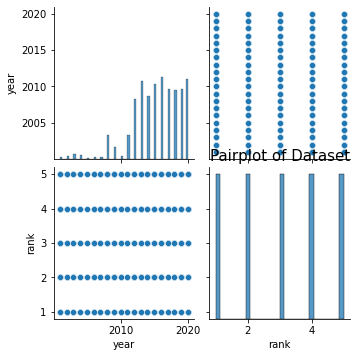

In [42]:
plt.figure(figsize=(12,8))
sns.pairplot(dataset)
plt.title('Pairplot of Dataset', fontsize = 15)
plt.show()

**Heatmap of Dataset**

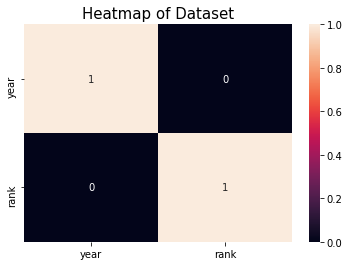

In [43]:
sns.heatmap(dataset.corr(), annot = True)
plt.title('Heatmap of Dataset', fontsize = 15)
plt.show()

**Preprocessing of Dataset**

In [48]:
from sklearn.preprocessing import LabelEncoder

dataset['location'] = LabelEncoder().fit_transform(dataset['location'])
dataset['category'] = LabelEncoder().fit_transform(dataset['category'])
dataset['query'] = LabelEncoder().fit_transform(dataset['query'])
dataset.head()

,location,category,rank,query
0,25,250,1,9114
1,25,250,2,11573
2,25,250,3,985
3,25,250,4,9560
4,25,250,5,303


**Splitting of Dataset**

In [67]:
x = dataset.iloc[:,[1,-1]].values
x = StandardScaler().fit_transform(x)
x.shape

(26955, 2)

**Using K-Means Clustering**

***The Elbow Method***

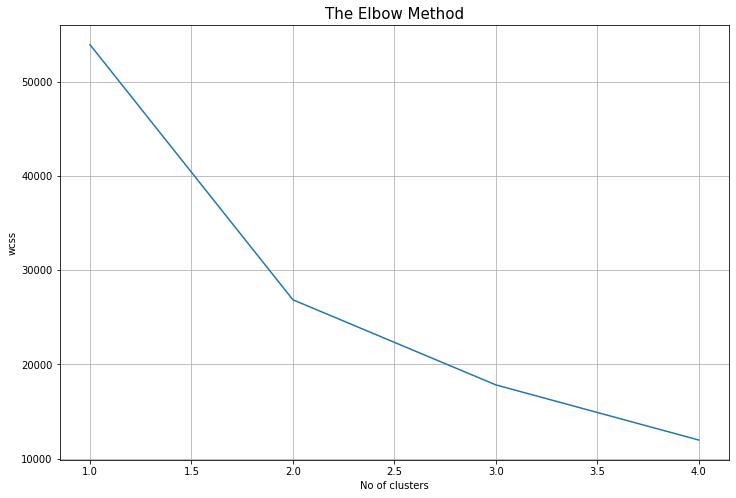

In [68]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,5):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.figure(figsize = (12,8))
plt.plot(range(1,5), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.grid()
plt.show()

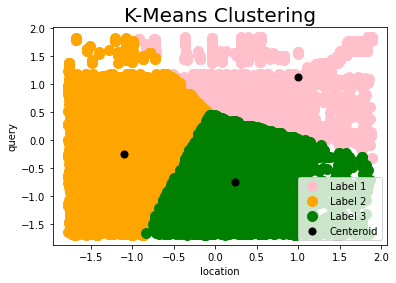

In [74]:
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c = 'pink', label = 'Label 1')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c = 'orange', label = 'Label 2')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c = 'green', label = 'Label 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centeroid')
plt.title('K-Means Clustering', fontsize = 20)
plt.xlabel('location')
plt.ylabel('query')
plt.legend()
plt.show()

**Using Hierarchical Clustering**

***Using Dendrogram***

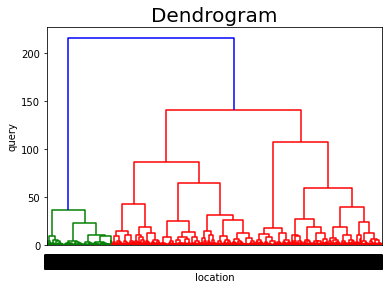

In [71]:
from scipy.cluster import hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('location')
plt.ylabel('query')
plt.show()

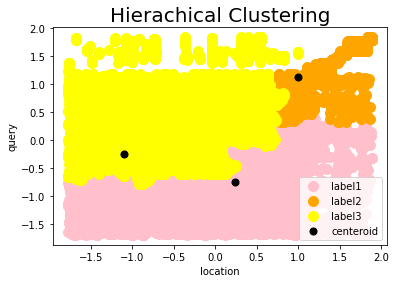

In [73]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
plt.scatter(x[y_hc == 0,0], x[y_hc == 0,1], s = 100, c = 'pink', label = 'label1')
plt.scatter(x[y_hc == 1,0], x[y_hc == 1,1], s = 100, c = 'orange', label = 'label2')
plt.scatter(x[y_hc == 2,0], x[y_hc == 2,1], s = 100, c = 'yellow', label = 'label3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'black', label = 'centeroid')
plt.title('Hierachical Clustering', fontsize = 20)
plt.xlabel('location')
plt.ylabel('query')
plt.legend()
plt.show()